In [1]:
!pip install opendatasets --upgrade --quiet


In [2]:
import pandas as pd 
import os 
import opendatasets as od
import numpy as np



In [3]:
# # assign the dataset url to a variable
# dataset_url = 'https://www.kaggle.com/rohanrao/nifty50-stock-market-data'

# # to use the opendatasets, download the dataset
# od.downloadq(dataset_url)

In [4]:
# list the files in the dataset
data_dir = './bttai-nybg-2024'

In [5]:
import pandas as pd

# Load the data
data_train = pd.read_csv('/Users/xiuwenzhu/Projects/Lantern_Flowers_BTT/BTTAIxNYBG-train.csv')

# Print the first few rows of the data
print(data_train.head())

   uniqueID           classLabel  classID source             imageFile
0         2   occluded-specimens        8      L  a1a8b48e8cb142b3.jpg
1         3    microscope-slides        6      L  79599db2ac9092b6.jpg
2         4  illustrations-color        2    BHL  c449696f2f0d0d92.jpg
3         5  illustrations-color        2      P  80a8f4a393b4e08c.jpg
4         6     animal-specimens        0     AK  041a1c6e73313638.jpg


In [6]:
data_test = pd.read_csv('/Users/xiuwenzhu/Projects/Lantern_Flowers_BTT/BTTAIxNYBG-test.csv')

# Print the first few rows of the data
print(data_test.head())

   uniqueID             imageFile
0         1  facd4dcd8e869617.jpg
1         9  78c96bb2b2b62579.jpg
2        10  d292d2c4e0e6ad9d.jpg
3        14  3633494929870713.jpg
4        16  dc94b496c8e2d6c4.jpg


In [7]:
x_train = np.array(data_train.iloc[:, 1:])
y_train = np.array(data_train.iloc[:, 0])

x_test = np.array(data_test.iloc[:, 1:])
y_test = np.array(data_test.iloc[:, 0])

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (81946, 4) y_train shape: (81946,)


In [8]:

print(data_train.describe())

            uniqueID       classID
count   81946.000000  81946.000000
mean    61352.780612      4.499597
std     35478.300906      2.872108
min         2.000000      0.000000
25%     30617.250000      2.000000
50%     61169.500000      4.000000
75%     92146.500000      7.000000
max    122879.000000      9.000000


In [9]:
# check if there are missing values
print(data_train.isnull().sum())


uniqueID      0
classLabel    0
classID       0
source        0
imageFile     0
dtype: int64


In [10]:
data_train.head()

,uniqueID,classLabel,classID,source,imageFile
0,2,occluded-specimens,8,L,a1a8b48e8cb142b3.jpg
1,3,microscope-slides,6,L,79599db2ac9092b6.jpg
2,4,illustrations-color,2,BHL,c449696f2f0d0d92.jpg
3,5,illustrations-color,2,P,80a8f4a393b4e08c.jpg
4,6,animal-specimens,0,AK,041a1c6e73313638.jpg


In [11]:
data_train['classLabel'].value_counts()

classLabel
live-plants                       8200
illustrations-color               8196
illustrations-gray                8196
biocultural-specimens             8195
micrographs-transmission-light    8195
occluded-specimens                8194
animal-specimens                  8194
mixed-pressed-specimens           8193
microscope-slides                 8192
ordinary-pressed-specimens        8191
Name: count, dtype: int64

In [12]:
# one hot encode the classes
data_encoded = pd.get_dummies(data_train, columns=['classLabel'])
print(data_encoded.head()) 

   uniqueID  classID source             imageFile  \
0         2        8      L  a1a8b48e8cb142b3.jpg   
1         3        6      L  79599db2ac9092b6.jpg   
2         4        2    BHL  c449696f2f0d0d92.jpg   
3         5        2      P  80a8f4a393b4e08c.jpg   
4         6        0     AK  041a1c6e73313638.jpg   

   classLabel_animal-specimens  classLabel_biocultural-specimens  \
0                        False                             False   
1                        False                             False   
2                        False                             False   
3                        False                             False   
4                         True                             False   

   classLabel_illustrations-color  classLabel_illustrations-gray  \
0                           False                          False   
1                           False                          False   
2                            True                          False   


In [13]:
%pip install pillow

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

## CNN


In [14]:
# build the cnn model for image classification
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



In [15]:
# Encode the class labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(data_train['classLabel'])

# Assuming data_train includes features (x_train) and labels (y_train)
x_train = data_train['imageFile']  # Replace with the actual feature column in your dataset
y_train_encoded = to_categorical(y_train_encoded)

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train_encoded, test_size=0.2, random_state=42)



In [16]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.3.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
alembic                       1.13.1
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
aniso8601                     9.0.1
annotated-types               0.6.0
anyio                         3.5.0
apispec                       5.2.2
apispec-webframeworks         0.5.2
appdirs                       1.4.4
applaunchservices             0.2.1
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.3.0
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomic

In [17]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [19]:

train_data_dir = '/Users/xiuwenzhu/Projects/Lantern_Flowers_BTT/BTTAIxNYBG-train.csv'


In [20]:
train_data = pd.read_csv(train_data_dir)


In [21]:
train_data.head()

,uniqueID,classLabel,classID,source,imageFile
0,2,occluded-specimens,8,L,a1a8b48e8cb142b3.jpg
1,3,microscope-slides,6,L,79599db2ac9092b6.jpg
2,4,illustrations-color,2,BHL,c449696f2f0d0d92.jpg
3,5,illustrations-color,2,P,80a8f4a393b4e08c.jpg
4,6,animal-specimens,0,AK,041a1c6e73313638.jpg


In [22]:
train_data['classLabel'].value_counts()

classLabel
live-plants                       8200
illustrations-color               8196
illustrations-gray                8196
biocultural-specimens             8195
micrographs-transmission-light    8195
occluded-specimens                8194
animal-specimens                  8194
mixed-pressed-specimens           8193
microscope-slides                 8192
ordinary-pressed-specimens        8191
Name: count, dtype: int64

In [23]:
train_data['uniqueID'].value_counts()

uniqueID
2         1
80442     1
81757     1
81754     1
81749     1
         ..
40771     1
40770     1
40769     1
40767     1
122879    1
Name: count, Length: 81946, dtype: int64

In [24]:
train_data.isnull().any()

uniqueID      False
classLabel    False
classID       False
source        False
imageFile     False
dtype: bool

In [25]:
# train_data.describe()

In [26]:
train_data['classID'].unique()

array([8, 6, 2, 0, 4, 1, 3, 7, 9, 5])

In [27]:
train_data['classLabel'].unique()

array(['occluded-specimens', 'microscope-slides', 'illustrations-color',
       'animal-specimens', 'live-plants', 'biocultural-specimens',
       'illustrations-gray', 'mixed-pressed-specimens',
       'ordinary-pressed-specimens', 'micrographs-transmission-light'],
      dtype=object)

In [28]:
# output the first five images frmo the dataset
train_data['imageFile'][:5]


0    a1a8b48e8cb142b3.jpg
1    79599db2ac9092b6.jpg
2    c449696f2f0d0d92.jpg
3    80a8f4a393b4e08c.jpg
4    041a1c6e73313638.jpg
Name: imageFile, dtype: object

In [29]:
import pandas as pd
from PIL import Image

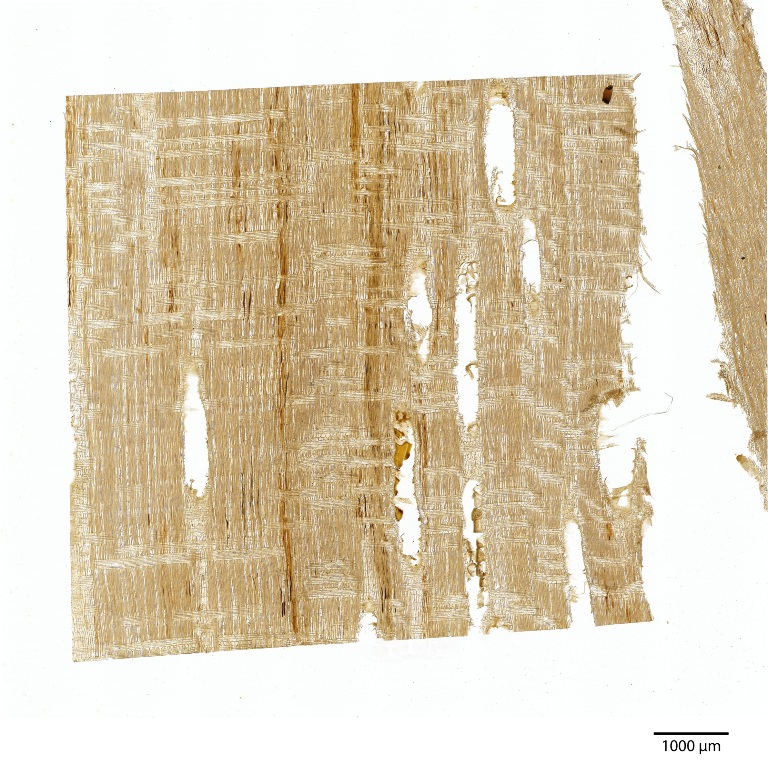

In [30]:
# print the first five images
from IPython.display import Image

# Define the image path - check the image path
img_path = '/Users/xiuwenzhu/Projects/Lantern_Flowers_BTT/BTTAIxNYBG-test/BTTAIxNYBG-test/0a0a1a1a1a1b1f00.jpg'

# test if the image is displayed
Image(filename=img_path)
    

In [31]:
# let's examine the dimenions for all the images in the training data set
# for CNN it is recommended for images to be of consistent size, how to handle this?
# should we handle horizontal and vertical images separately?

from PIL import Image

verticalImages = []
horizontalImages = []
# hmap for distinct image dimensions {(w,h) : count}
training_image_dimensions_collection = {}

for dirname, _, filenames in os.walk('/Users/xiuwenzhu/Projects/Lantern_Flowers_BTT/BTTAIxNYBG-train/BTTAIxNYBG-train'):
    for filename in filenames:
        image_path = os.path.join(dirname, filename)
        img = Image.open(image_path)
        width, height = img.size
        print(f"Image dimensions: {width} x {height}")
        if (width,height) in training_image_dimensions_collection:
            training_image_dimensions_collection[(width,height)] += 1
        else:
            training_image_dimensions_collection[(width,height)] = 1

        if width > height:
            horizontalImages.append(image_path)
        else:
            verticalImages.append(image_path)

Image dimensions: 768 x 1922
Image dimensions: 768 x 1175
Image dimensions: 1024 x 768
Image dimensions: 768 x 1197
Image dimensions: 768 x 2230
Image dimensions: 768 x 1089
Image dimensions: 768 x 1090
Image dimensions: 768 x 1026
Image dimensions: 768 x 768
Image dimensions: 1023 x 768
Image dimensions: 768 x 1096
Image dimensions: 768 x 1152
Image dimensions: 768 x 1131
Image dimensions: 768 x 1097
Image dimensions: 768 x 1090
Image dimensions: 768 x 1152
Image dimensions: 2155 x 768
Image dimensions: 768 x 1034
Image dimensions: 768 x 1026
Image dimensions: 768 x 965
Image dimensions: 768 x 815
Image dimensions: 768 x 1200
Image dimensions: 1152 x 768
Image dimensions: 768 x 1135
Image dimensions: 768 x 1273
Image dimensions: 768 x 2217
Image dimensions: 768 x 1922
Image dimensions: 1150 x 768
Image dimensions: 1165 x 768
Image dimensions: 768 x 1156
Image dimensions: 768 x 1152
Image dimensions: 768 x 1426
Image dimensions: 768 x 1189
Image dimensions: 768 x 1084
Image dimensions:

In [32]:
import copy
print(f"No. Vertical Images: {len(verticalImages)}\nNo. Horizontal Images: {len(horizontalImages)}")
print("\n\n")
print("The distinct number of dimensions are as follows")

# Compute mean x,y for horizontal and vertical image collections
# print(type(verticalImages),type(horizontalImages))
# lists
# print(horizontalImages[0]) # each entry is a image path

# vertical images dimensions list [(dim_x1,dim_y1),....]

# use numpy to get an average of the x and y dimenions for both horizontal and vertical image lists

import sys, functools
# store min dimensions for horiz,verti for resizing

min_x_h,min_y_h = sys.maxsize,sys.maxsize
min_x_v,min_y_v = sys.maxsize,sys.maxsize
print("determining min dimensions for v and h images....")
h_widths = [Image.open(i_path).size[0] for i_path in horizontalImages]
min_x_h = np.min(np.array(h_widths))
h_heights = [Image.open(i_path).size[1] for i_path in horizontalImages]
min_y_h = np.min(np.array(h_heights))
v_widths = [Image.open(i_path).size[0] for i_path in verticalImages]
min_x_v = np.min(np.array(v_widths))
v_heights = [Image.open(i_path).size[1] for i_path in verticalImages]
min_y_v = np.min(np.array(v_heights))

print("....done")
print("Min horizontal image dimensions are ...",min_x_h,min_y_h)
print("Min veritical image dimensions are ...",min_x_v,min_y_v)


No. Vertical Images: 64132
No. Horizontal Images: 17814



The distinct number of dimensions are as follows
determining min dimensions for v and h images....
....done
Min horizontal image dimensions are ... 769 768
Min veritical image dimensions are ... 768 768


Note: From the output above, we can see the minimum horizontal image dimensions as 769 x 768 and the minimum vertical image dimensions as 768 x 768. The minimum dimensions are used to identify the smallest width and height among all the images in each category (horizontal and vertical).

The minimum dimensions (min_x_h, min_y_h, min_x_v, min_y_v) are then printed, and these values are used for resizing the images during the training process.

In [33]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [34]:

# Load your dataset and define directories for training and validation
# Adjust the paths based on your dataset structure
train_dir = "/Users/xiuwenzhu/Projects/Lantern_Flowers_BTT/BTTAIxNYBG-train"
val_dir = '/Users/xiuwenzhu/Projects/Lantern_Flowers_BTT/BTTAIxNYBG-validation'

# Define image size and batch size
img_size = (768,768)  # each image will be resized to 768x768 pixels
batch_size = 32 # 32 images will be used in each iteration(model takes in 32 images at a time)

# Data Augmentation (optional but recommended) - used to increase the diversity of the training data and avoid overfitting
# ImageDataGenerator is used to generate batches of tensor image data with real-time data augmentation. 
# The transformation include rescle, shear, zoom and horizontal flip the images. 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# instance of ImageDataGenerator that only rescales the images since data augmentation only onapplied to the training data.
val_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation data
# one hot encode the labels because of multi-class classification
# class_mode is set to 'categorical' to return 2D one-hot encoded labels
# flow_from_directory method is used to generate batches of augmented data(imaged and labels) 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)



Found 81946 images belonging to 1 classes.
Found 10244 images belonging to 1 classes.


In [35]:
val_generator.dtype

'float32'

In [36]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))  # num_classes is the number of flower classes

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust as needed
    validation_data=val_generator
)

Epoch 1/10
   2/2561 [..............................] - ETA: 14:52:49 - loss: 369.3578 - accuracy: 0.0000e+00

KeyboardInterrupt: 

In [ ]:

# Evaluate the model on the test set (you'll need another directory for testing)
test_dir = '/Users/xiuwenzhu/Projects/Lantern_Flowers_BTT/BTTAIxNYBG-test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc} ")



SyntaxError: unterminated string literal (detected at line 2) (1558240301.py, line 2)

# Starter code


In [37]:

# Load dataset & Define image directory

# NOTE: if we have seperate train dataset and validate dataset, you may want to seperately load it with pd.read_csv() 

train_df = pd.read_csv('/Users/xiuwenzhu/Projects/Lantern_Flowers_BTT/BTTAIxNYBG-train.csv')
validate_df = pd.read_csv('/Users/xiuwenzhu/Projects/Lantern_Flowers_BTT/BTTAIxNYBG-validation.csv')


train_img_dir = '/Users/xiuwenzhu/Projects/Lantern_Flowers_BTT/BTTAIxNYBG-train'

val_img_dir = '/Users/xiuwenzhu/Projects/Lantern_Flowers_BTT/BTTAIxNYBG-validation'



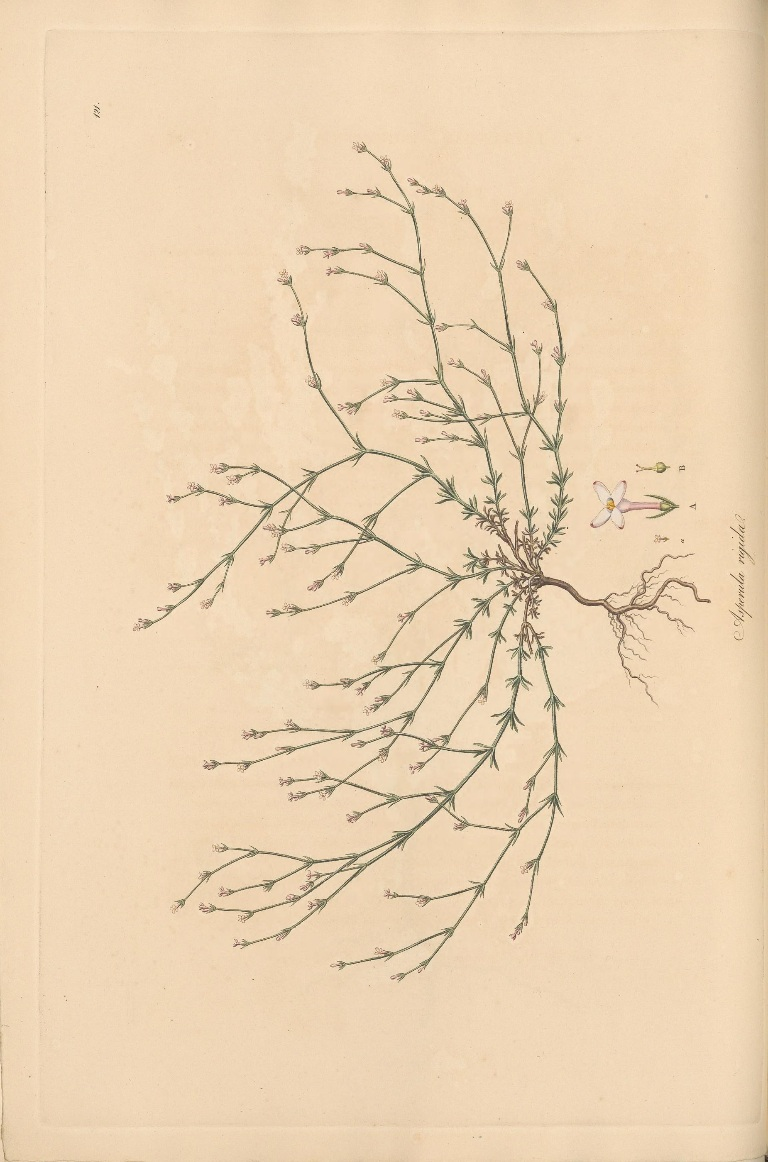

In [38]:
# print the first five images
from IPython.display import Image

# Define the image path - check the image path
img_path = '/Users/xiuwenzhu/Projects/Lantern_Flowers_BTT/BTTAIxNYBG-train/BTTAIxNYBG-train/0a0e0616060e0e8e.jpg'

# test if the image is displayed
Image(filename=img_path)
    

In [39]:
from tensorflow import keras
from PIL import Image


import os
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from PIL import Image

In [40]:
import keras
from keras.preprocessing.image import load_img

In [41]:
train_df.head()

,uniqueID,classLabel,classID,source,imageFile
0,2,occluded-specimens,8,L,a1a8b48e8cb142b3.jpg
1,3,microscope-slides,6,L,79599db2ac9092b6.jpg
2,4,illustrations-color,2,BHL,c449696f2f0d0d92.jpg
3,5,illustrations-color,2,P,80a8f4a393b4e08c.jpg
4,6,animal-specimens,0,AK,041a1c6e73313638.jpg


In [42]:
# img = load_img('/Users/xiuwenzhu/Projects/Lantern_Flowers_BTT/BTTAIxNYBG-train/BTTAIxNYBG-train/0a0a4b6f2f4f4747.jpg')

In [43]:

# Create an ImageDataGenerator object
datagen = ImageDataGenerator(rescale=1./255)

def load_and_preprocess_image(filename, target_size=(224, 224)):
    img_path = os.path.join(train_img_dir, filename)
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Model expects a batch of images
    return datagen.standardize(img_array)  # Normalize to [0, 1]


In [44]:


# # Apply preprocessing to all images
# image_directory = os.getcwd()  # Current working directory - /Users/xiuwenzhu/Projects/Lantern_Flowers_BTT
# print(image_directory)
train_df['imageData'] = train_df['imageFile'].apply(load_and_preprocess_image)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/xiuwenzhu/Projects/Lantern_Flowers_BTT/BTTAIxNYBG-train/a1a8b48e8cb142b3.jpg'

In [ ]:
!pip install pillow 


In [ ]:

# Split dataset into training and validation sets
### Note: This is a common step in ML training, but in this challenge, since the validation set is provided separately, there is no need to call this function to distinguish between validation and train set.
# train_df, validate_df = train_test_split(df, test_size=0.2, random_state=42)

# Data augmentation configuration for training
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Note: No augmentation for validation data, only rescaling
validation_datagen = ImageDataGenerator(rescale=1./255)

# Convert dataframe to a format suitable for the model training
def df_to_dataset(dataframe, datagen, batch_size=32):
    datagen.flow_from_dataframe(
        dataframe=dataframe,
        directory=image_directory,
        x_col='imageFile',
        y_col='classLabel',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical'  # Change this if not a multiclass classification
    )

# Create datasets for training and validation
train_dataset = df_to_dataset(train_df, train_datagen)
validation_dataset = df_to_dataset(validate_df, validation_datagen)

# This setup is now ready for training with model.fit using the train_dataset and validation_dataset